In [1]:
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim
from torchvision import transforms, utils, models
from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

C:\Users\lenovo\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
data_dir = "../Desktop/CoreProject/"

In [3]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])


In [4]:
train_data = datasets.ImageFolder(data_dir + 'training_set', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + 'test_set', transform=test_transforms)

In [5]:
for image,label in train_data:
    print(image.shape)
    break

torch.Size([3, 280, 280])


In [6]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64,shuffle=True)

In [7]:
iter_ = iter(trainloader)
image,label = next(iter_)
print(image.shape)
print(label)

torch.Size([64, 3, 280, 280])
tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])


In [8]:
def image_convert(img):
    img = img.clone().cpu().numpy()
    img = img.transpose(1,2,0)
    std = [0.5,0.5,0.5]
    mean = [0.5,0.5,0.5]
    img = img*std + mean
    return img

In [9]:
def plot_10():
        iter_ = iter(trainloader)
        images,labels = next(iter_)
        an_ = {'0':'Underpass','1':'Underpass water'}
        
        plt.figure(figsize=(20,10))
        for idx in range(10):
            plt.subplot(2,5,idx+1)
            img = image_convert(images[idx])
            label = labels[idx]
            plt.imshow(img)
            plt.title(an_[str(label.numpy())])
        plt.show()

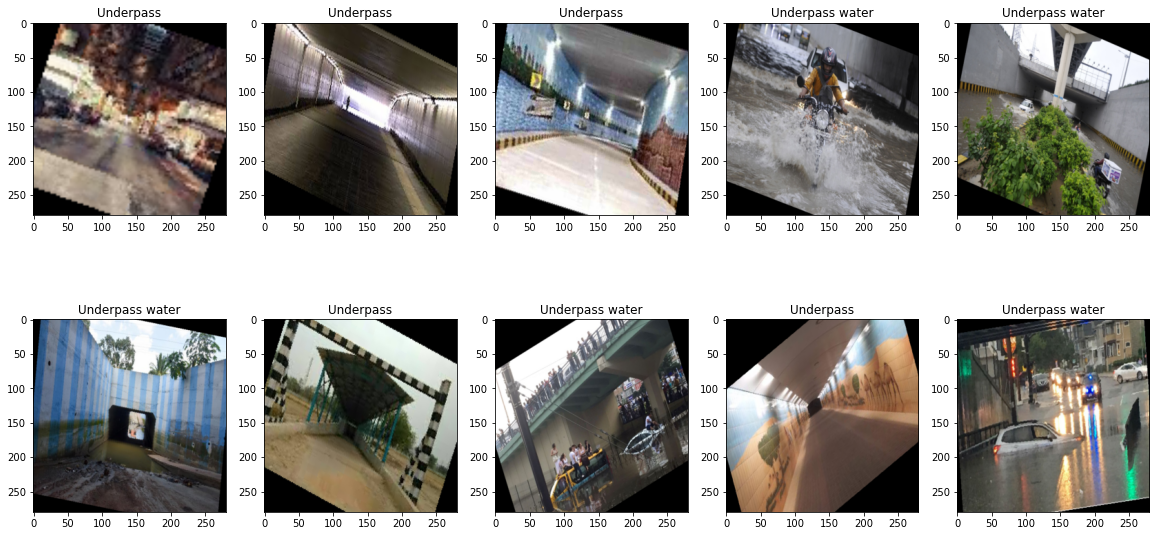

In [10]:
plot_10()

In [11]:
model =  models.resnet18(pretrained=True).to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
from torch import nn
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(512,120)
        self.linear2=nn.Linear(120,2)
    
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [13]:
model_ = Dc_model().to(device)
model_

Dc_model(
  (linear1): Linear(in_features=512, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=2, bias=True)
)

In [14]:
model.fc = model_
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
for param in model.parameters():
        param.requires_grad = False
for param in model.fc.parameters():
        param.requires_grad = True

In [16]:
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(),lr=0.001)
#criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adagrad(model.parameters(),lr=0.001)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [18]:
train_loss = []
val_loss = []
val_acc = []
train_acc = []
epochs = 5

for epoch in range(epochs):
    print("epoch {}/{}".format(epoch+1,epochs))
    running_loss = 0.0
    running_score = 0.0
#       model.train()
    for image,label in trainloader:
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        y_pred = model.forward(image)
        loss = criterion(y_pred,label)         
        loss.backward() #calculate derivatives 
        optimizer.step() # update parameters
        val, index_ = torch.max(y_pred,axis=1)
        running_score += torch.sum(index_ == label.data).item()
        running_loss += loss.item()  
    epoch_score = running_score/len(trainloader.dataset)
    epoch_loss = running_loss/len(trainloader.dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_score*100)
    print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        running_score = 0.0
        for image,label in testloader:
            image = image.to(device)
            label = label.to(device)
            optimizer.zero_grad()
            y_pred = model.forward(image)
            loss = criterion(y_pred,label)
            running_loss += loss.item()

            val, index_ = torch.max(y_pred,axis=1)
            running_score += torch.sum(index_ == label.data).item()
            
        epoch_score = running_score/len(testloader.dataset)
        epoch_loss = running_loss/len(testloader.dataset)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_score*100)
        print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))

epoch 1/5
Training loss: 0.006456904362959416, accuracy: 0.8059964726631393
Validation loss: 0.005419075236482136, accuracy: 0.864406779661017
epoch 2/5
Training loss: 0.005334968972668656, accuracy: 0.8483245149911817
Validation loss: 0.006107619758379661, accuracy: 0.8728813559322034
epoch 3/5
Training loss: 0.005086138765647928, accuracy: 0.8518518518518519
Validation loss: 0.005117886147256625, accuracy: 0.8813559322033898
epoch 4/5
Training loss: 0.004715313776880766, accuracy: 0.8994708994708994
Validation loss: 0.005108554737042572, accuracy: 0.8728813559322034
epoch 5/5
Training loss: 0.004365705702670667, accuracy: 0.892416225749559
Validation loss: 0.0049552571470454585, accuracy: 0.8898305084745762


In [19]:
PATH = './Underpass_water_detection.pth'
torch.save(model_.state_dict(), PATH)

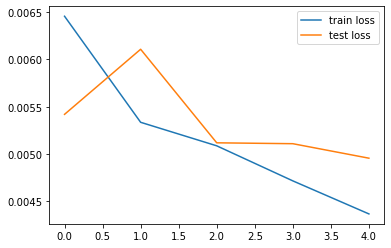

In [20]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='test loss')
plt.legend()
plt.show()

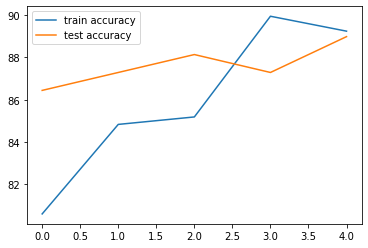

In [21]:
plt.plot(train_acc,label='train accuracy')
plt.plot(val_acc,label='test accuracy')
plt.legend()
plt.show()

In [22]:
def plot_val_images():
    label_dict = ['Underpass','Underpass_water']
    iter_ = iter(testloader)
    images,labels = next(iter_)
    images = images.to(device)
    pred_labels = labels.to(device)

    
    img_out = model.forward(images)
    value, index_val = torch.max(img_out, 1)

    # label = label_dict[str(label)]
    fig = plt.figure(figsize=(30,20),dpi=100)
    for idx in np.arange(10):
        ax = fig.add_subplot(2,5,idx+1)
        plt.imshow(image_convert(images[idx]))
        label = labels[idx]  
        pred_label = pred_labels[idx]
        ax.set_title('Act {},pred {}'.format(label_dict[label],label_dict[pred_label]))


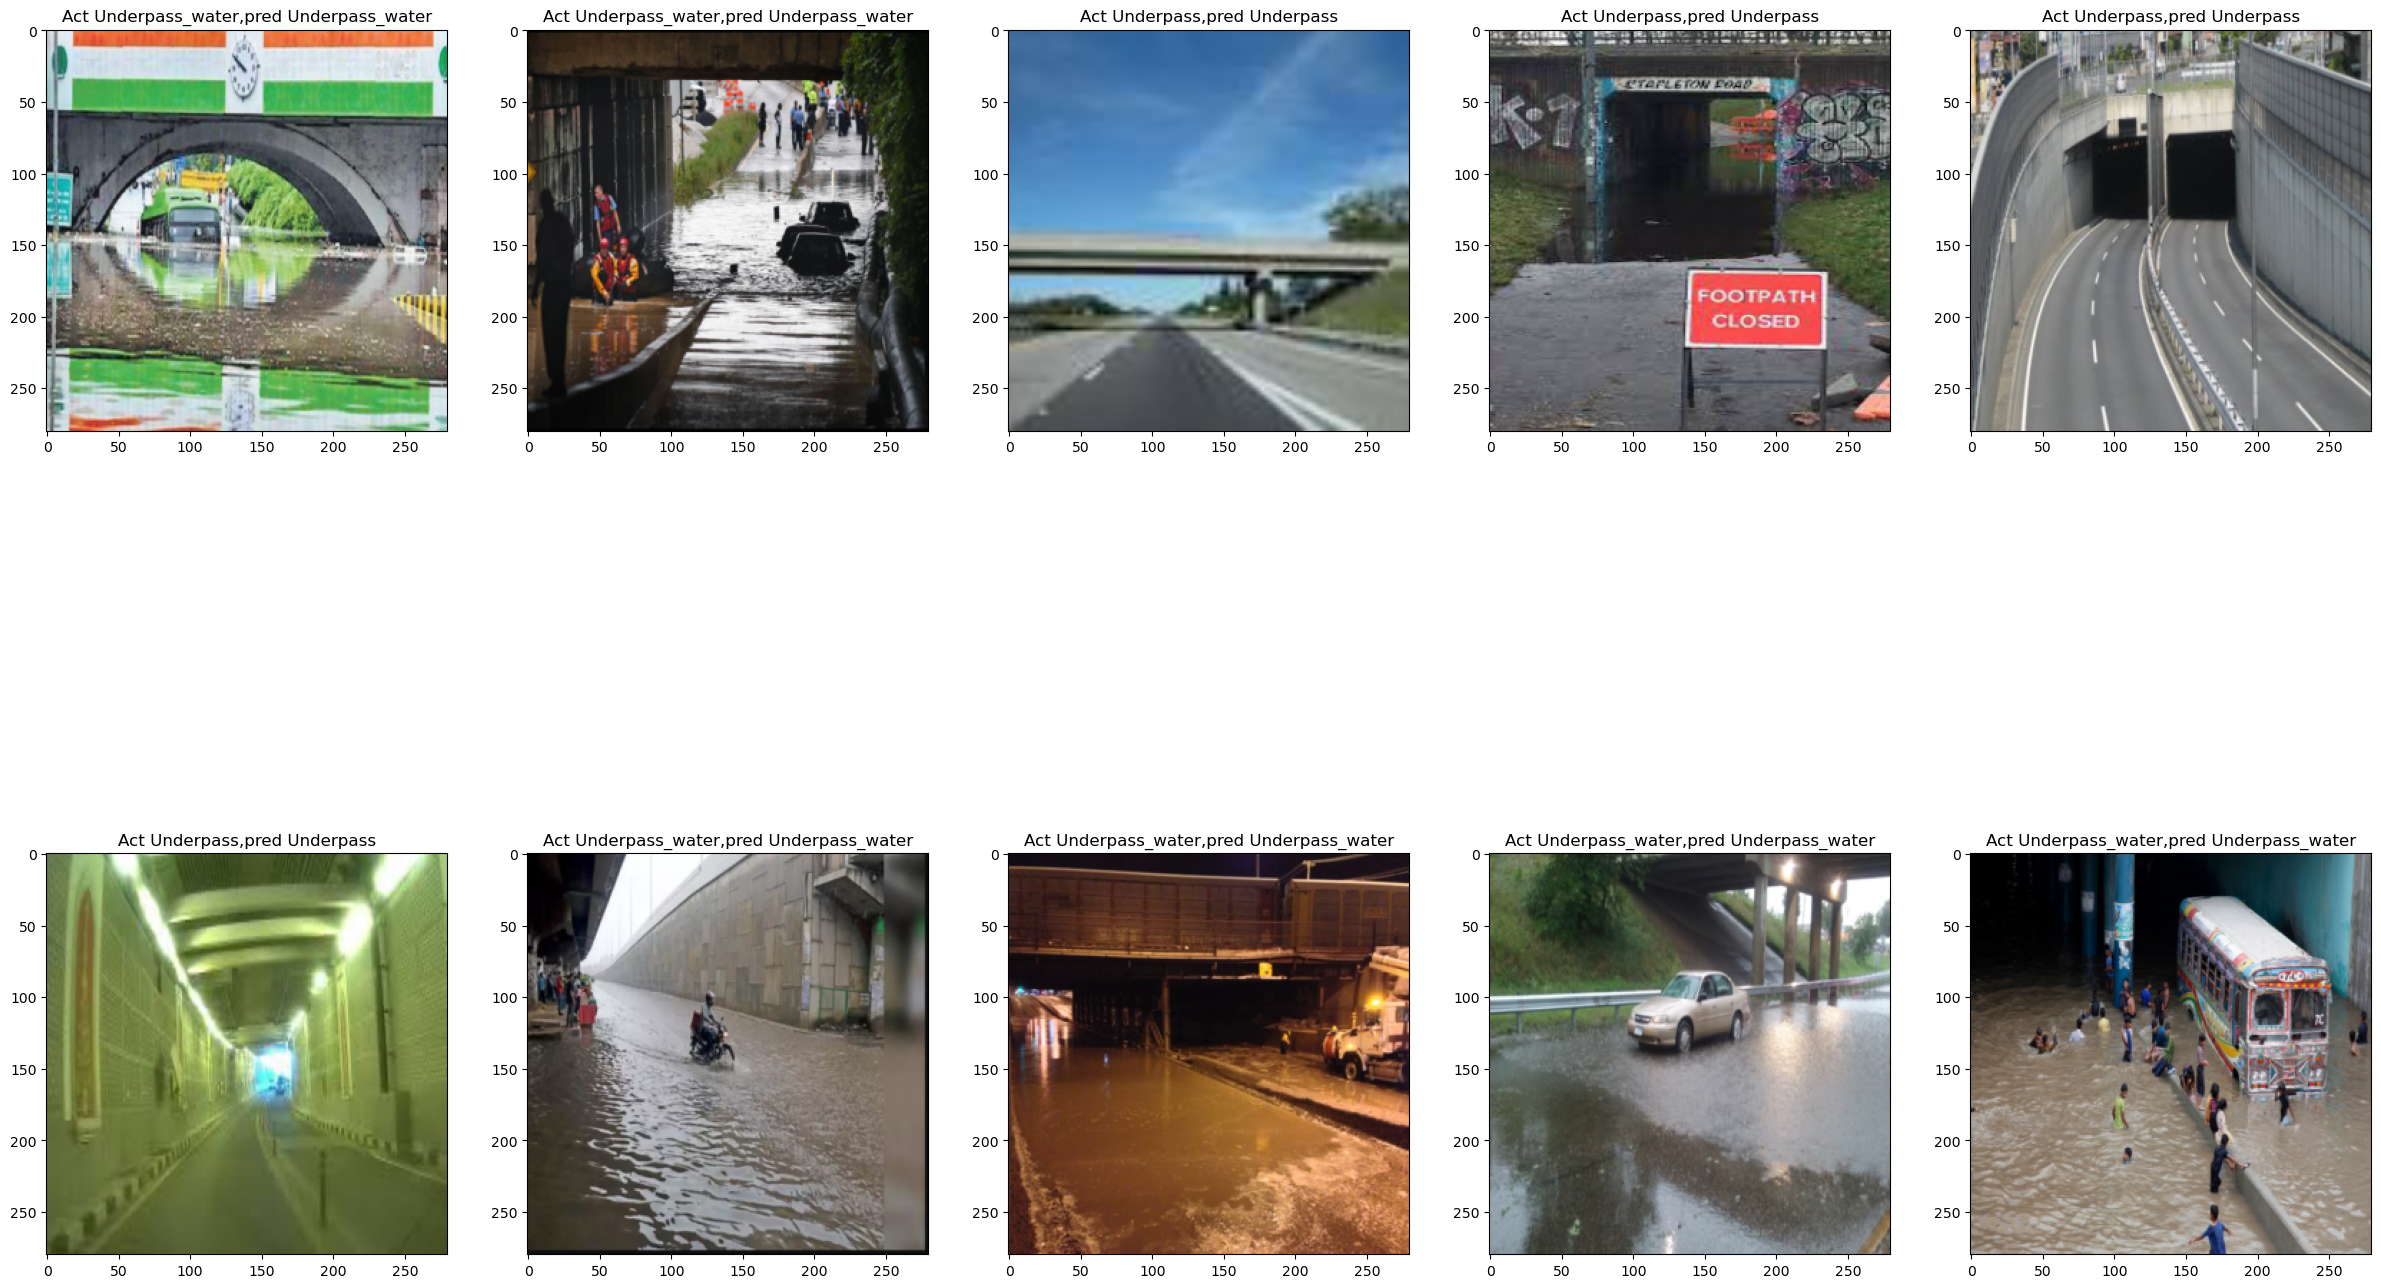

In [23]:
plot_val_images()

In [24]:
model1 =  models.resnet34(pretrained=True).to(device)
print(model1)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [25]:
from torch import nn
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(512,120)
        self.linear2=nn.Linear(120,2)
    
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [26]:
model_ = Dc_model().to(device)
model_

Dc_model(
  (linear1): Linear(in_features=512, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=2, bias=True)
)

In [27]:
model1.fc = model_
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
for param in model.parameters():
        param.requires_grad = False
for param in model.fc.parameters():
        param.requires_grad = True

In [29]:
#model1.fc = nn.Sequential(nn.Linear(2048, 512),
                                # nn.ReLU(),
                               #  nn.Dropout(0.2),
                               #  nn.Linear(512, 10),
                               #  nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [30]:
train_loss = []
val_loss = []

epochs = 5

for epoch in range(epochs):
    print("epoch {}/{}".format(epoch+1,epochs))
    running_loss = 0.0
    running_score = 0.0
#       model.train()
    for image,label in trainloader:
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        y_pred = model.forward(image)
        loss = criterion(y_pred,label)         
        loss.backward() #calculate derivatives 
        optimizer.step() # update parameters
        val, index_ = torch.max(y_pred,axis=1)
        running_score += torch.sum(index_ == label.data).item()
        running_loss += loss.item()  
    epoch_score = running_score/len(trainloader.dataset)
    epoch_loss = running_loss/len(trainloader.dataset)
    train_loss.append(epoch_loss*100)
    print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
    with torch.no_grad():
        model.eval()
        running_loss = 0.0
        running_score = 0.0
        for image,label in testloader:
            image = image.to(device)
            label = label.to(device)
            optimizer.zero_grad()
            y_pred = model.forward(image)
            loss = criterion(y_pred,label)
            running_loss += loss.item()

            val, index_ = torch.max(y_pred,axis=1)
            running_score += torch.sum(index_ == label.data).item()
            
        epoch_score = running_score/len(testloader.dataset)
        epoch_loss = running_loss/len(testloader.dataset)
        val_loss.append(epoch_loss*100)
        print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))

epoch 1/5
Training loss: 0.005240426071947424, accuracy: 0.855379188712522
Validation loss: 0.00503197463892274, accuracy: 0.8728813559322034
epoch 2/5
Training loss: 0.0043262223297536265, accuracy: 0.890652557319224
Validation loss: 0.00482090044829805, accuracy: 0.864406779661017
epoch 3/5
Training loss: 0.0038349245538576993, accuracy: 0.91005291005291
Validation loss: 0.004871436094833633, accuracy: 0.8728813559322034
epoch 4/5
Training loss: 0.0038504589487005163, accuracy: 0.908289241622575
Validation loss: 0.004599883899850361, accuracy: 0.864406779661017
epoch 5/5
Training loss: 0.0035641783654584668, accuracy: 0.9223985890652557
Validation loss: 0.004609807820643409, accuracy: 0.864406779661017


In [31]:
PATH = './Underpass_water_detection.pth'
torch.save(model_.state_dict(), PATH)

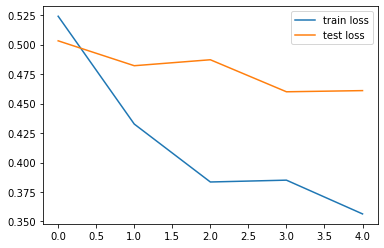

In [32]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='test loss')
plt.legend()
plt.show()


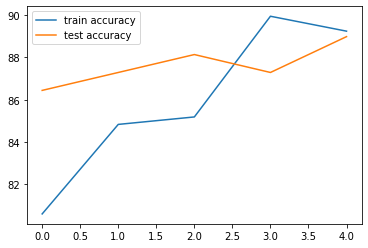

In [33]:
plt.plot(train_acc,label='train accuracy')
plt.plot(val_acc,label='test accuracy')
plt.legend()
plt.show()

In [41]:
def plot_val_images():
    label_dict = ['Underpass','Underpass_water']
    iter_ = iter(testloader)
    images,labels = next(iter_)
    images = images.to(device)
    pred_labels = labels.to(device)

    
    img_out = model.forward(images)
    value, index_val = torch.max(img_out, 1)

    #label = label_dict[str(label)]
    fig = plt.figure(figsize=(30,20),dpi=100)
    for idx in np.arange(10):
        ax = fig.add_subplot(2,5,idx+1)
        plt.imshow(image_convert(images[idx]))
        label = labels[idx]  
        pred_label = pred_labels[idx]
        ax.set_title('Act {},pred {}'.format(label_dict[label],label_dict[pred_label]))


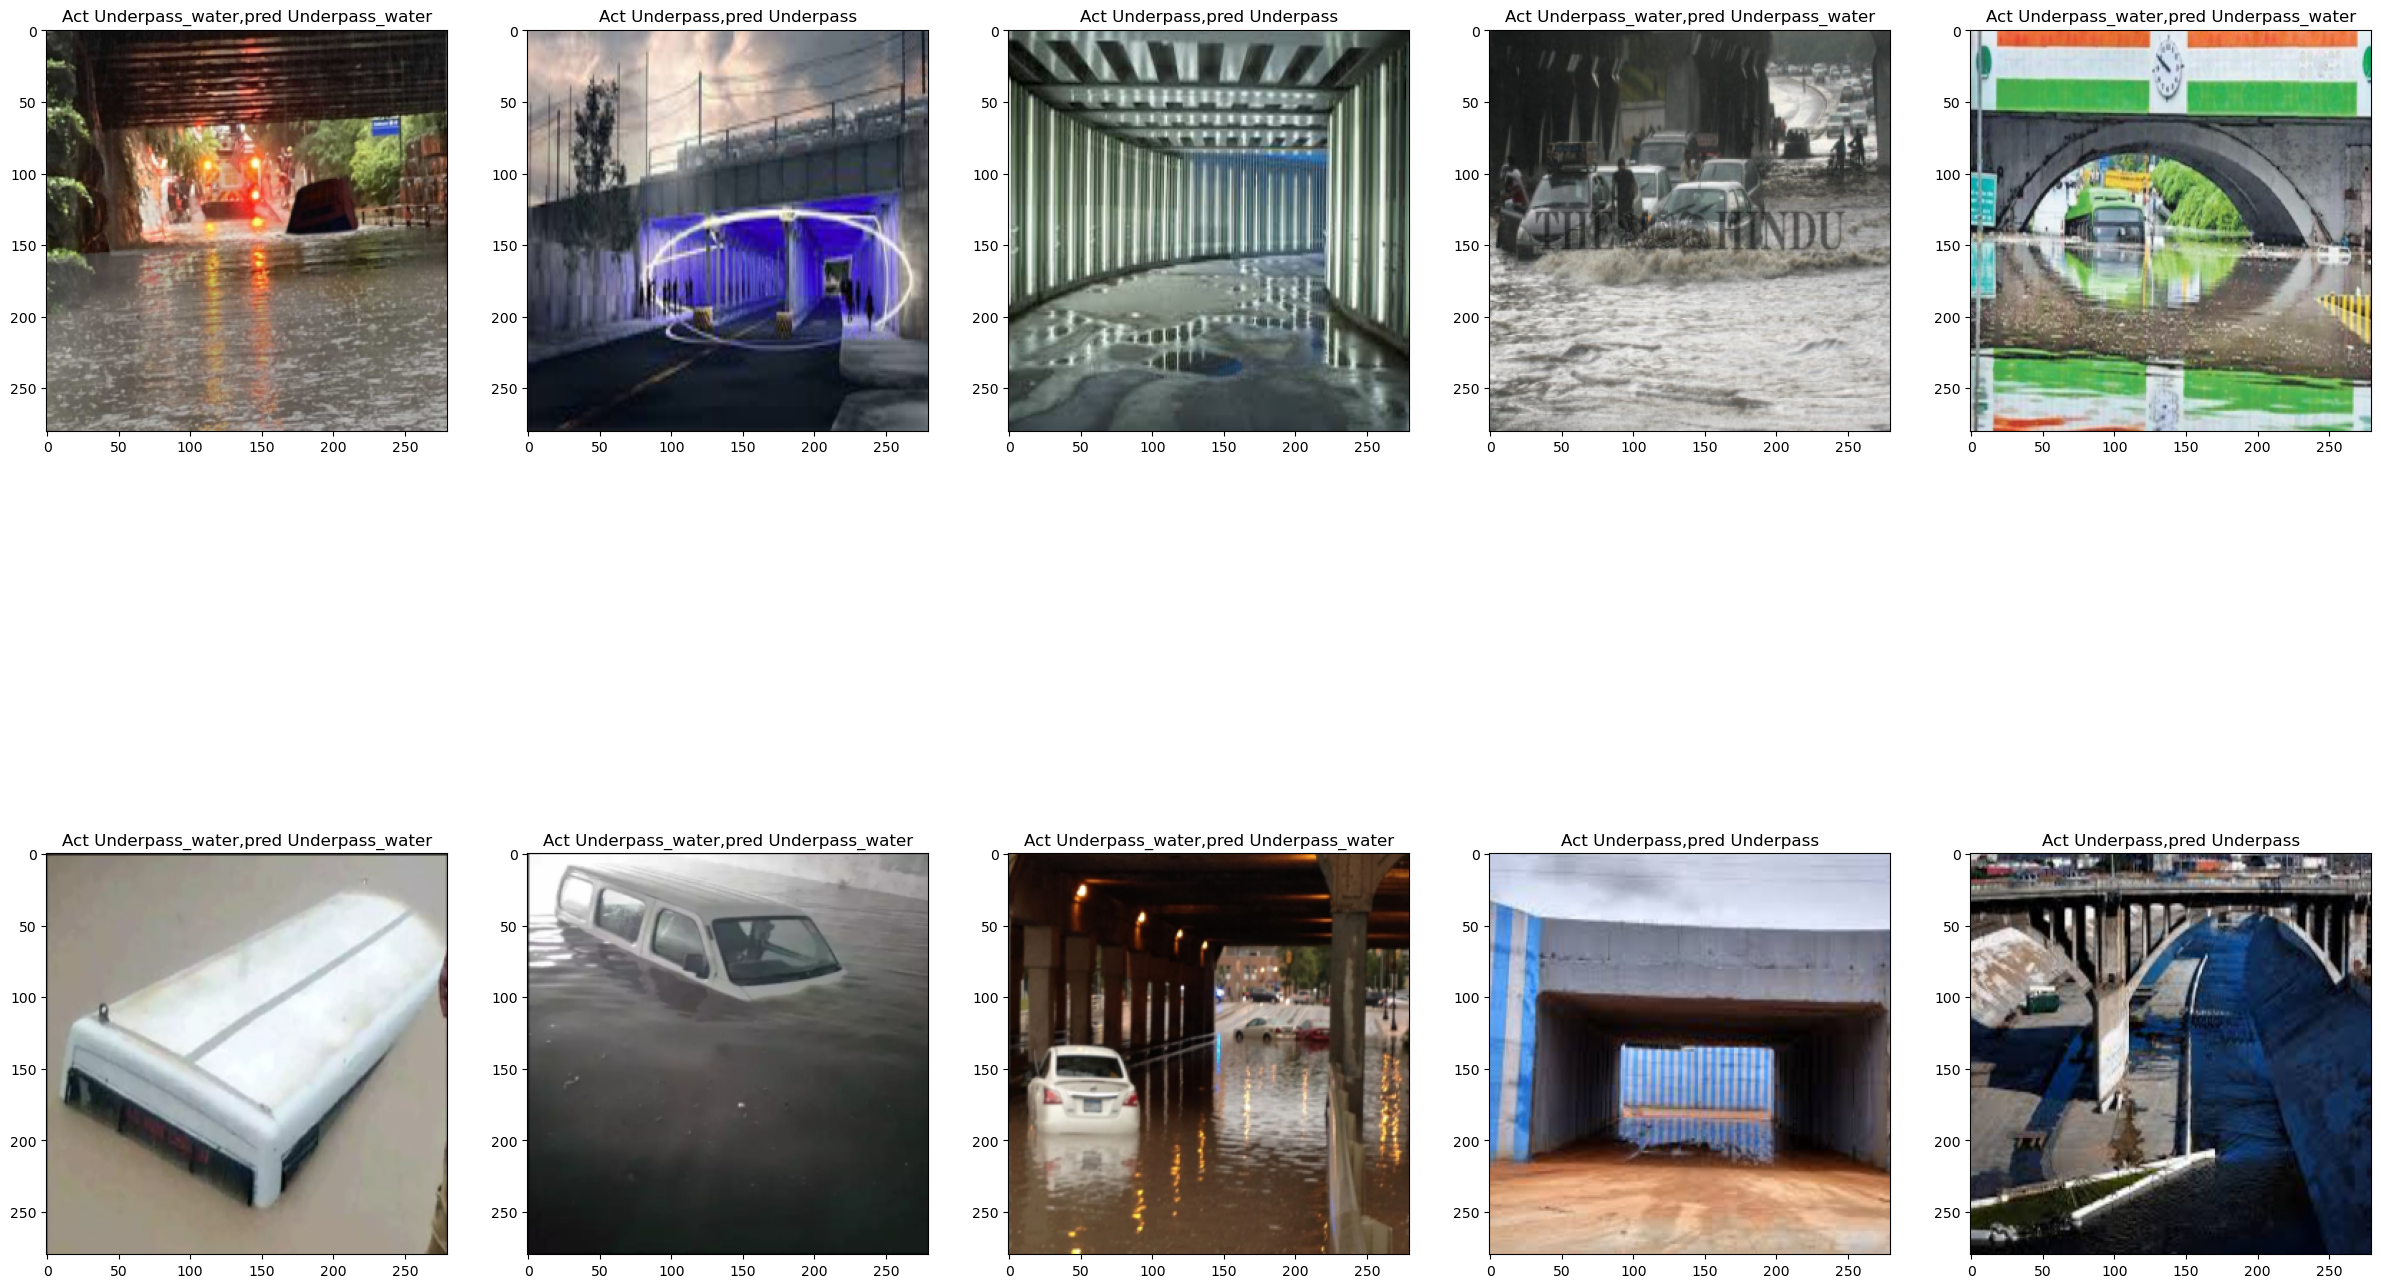

In [42]:
plot_val_images()